In [65]:
import h5py
import numpy as np
from google.colab import drive
from matplotlib import pyplot as plt
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Reshape,BatchNormalization,Dropout
from tensorflow.keras import regularizers, optimizers
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score,recall_score,f1_score,precision_recall_curve
import tensorflow
from matplotlib import pyplot as plt
%matplotlib inline

drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [3]:
# open the file as read only
h5f = h5py.File('/content/gdrive/My Drive/assignments/deeplearning1_intro/SVHN_single_grey1.h5','r')

In [4]:
data = list(h5f)
data

['X_test', 'X_train', 'X_val', 'y_test', 'y_train', 'y_val']

In [5]:
# Load the trainig and testing set from the dataset
# data is fetching as train,test,val
X_train = h5f['X_train'][:]
y_train = h5f['y_train'][:]
X_test = h5f['X_test'][:]
y_test = h5f['y_test'][:]
X_val = h5f['X_val'][:]
y_val = h5f['y_val'][:]

In [6]:
# printing the testing and training data set shape - Udnerstanding the split data shapes
print("Shape of X_train data is : ",X_train.shape)
print("Shape of X_test data is : ",X_test.shape)
print("Shape of y_train data is : ",y_train.shape)
print("Shape of y_test data is : ",y_test.shape)
print("Shaoe of X_val is : ",X_val.shape)
print("Shape of y_val is :",y_val.shape)

Shape of X_train data is :  (42000, 32, 32)
Shape of X_test data is :  (18000, 32, 32)
Shape of y_train data is :  (42000,)
Shape of y_test data is :  (18000,)
Shaoe of X_val is :  (60000, 32, 32)
Shape of y_val is : (60000,)


In [7]:
# Reshaping the data
X_train = X_train.reshape(42000, 1024)
print(X_train.shape)
X_val = X_val.reshape(60000, 1024)
print(X_val.shape)

(42000, 1024)
(60000, 1024)


In [8]:
# Normalizing the X_train and X_test
print(X_train.max())
print(X_test.max())

X_train = X_train / 255.0
X_test = X_test / 255.0

print(X_train.max())
print(X_test.max())

254.9745
254.9745
0.9999
0.9999


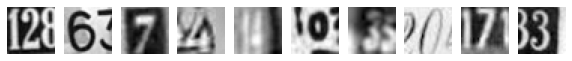

label for each of the above image: [2 6 7 4 4 0 3 0 7 3]


In [9]:
plt.figure(figsize = (10,1))
for i in range(10):
    plt.subplot(1, 10, i+1)
    plt.imshow(X_train[i].reshape(32, 32), cmap="gray")
    plt.axis('off')
plt.show()
print('label for each of the above image: %s' % (y_train[0:10]))

In [10]:
# One-hot encoding - Converting the integers to binary class matrics
print("Value before encoding : ",y_train[0])

y_train = to_categorical(y_train, num_classes = 10)
y_test = to_categorical(y_test, num_classes = 10)

print("Shape of y_train : ", y_train.shape)
print("Shape of y_test : ", y_test.shape)

Value before encoding :  2
Shape of y_train :  (42000, 10)
Shape of y_test :  (18000, 10)


In [11]:
# Creating the model
model = Sequential()

# Reshape data from 2D to 1D -> 28x28 to 784
model.add(Reshape((1024,),input_shape=(32,32,)))

# Normalize the data
model.add(BatchNormalization())

In [12]:
# Hidden layers
model.add(Dense(200, activation='relu', name='Layer_1'))
model.add(Dense(100, activation='relu', name='Layer_2'))

# Dropout layer
model.add(Dropout(0.5))

# Hidden layers
model.add(Dense(60, activation='relu', name='Layer_3'))
model.add(Dense(30, activation='relu', name='Layer_4'))

# Dropout layer
model.add(Dropout(0.3))

In [13]:
#Output layer
model.add(Dense(10, activation='softmax', name='Output'))

In [14]:
#Compiling the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [15]:
# Model summery
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape (Reshape)            (None, 1024)              0         
_________________________________________________________________
batch_normalization (BatchNo (None, 1024)              4096      
_________________________________________________________________
Layer_1 (Dense)              (None, 200)               205000    
_________________________________________________________________
Layer_2 (Dense)              (None, 100)               20100     
_________________________________________________________________
dropout (Dropout)            (None, 100)               0         
_________________________________________________________________
Layer_3 (Dense)              (None, 60)                6060      
_________________________________________________________________
Layer_4 (Dense)              (None, 30)                1

In [16]:
# Fitting the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=30, batch_size = 45)

Epoch 1/30
934/934 [==============================] - 6s 7ms/step - loss: 2.1290 - accuracy: 0.2024 - val_loss: 1.6016 - val_accuracy: 0.4637
Epoch 2/30
934/934 [==============================] - 6s 6ms/step - loss: 1.6462 - accuracy: 0.4174 - val_loss: 1.2459 - val_accuracy: 0.5924
Epoch 3/30
934/934 [==============================] - 6s 6ms/step - loss: 1.4327 - accuracy: 0.5134 - val_loss: 1.0850 - val_accuracy: 0.6589
Epoch 4/30
934/934 [==============================] - 6s 7ms/step - loss: 1.3016 - accuracy: 0.5680 - val_loss: 0.9500 - val_accuracy: 0.7088
Epoch 5/30
934/934 [==============================] - 6s 7ms/step - loss: 1.1864 - accuracy: 0.6137 - val_loss: 0.8937 - val_accuracy: 0.7248
Epoch 6/30
934/934 [==============================] - 6s 6ms/step - loss: 1.0966 - accuracy: 0.6520 - val_loss: 0.8058 - val_accuracy: 0.7558
Epoch 7/30
934/934 [==============================] - 6s 7ms/step - loss: 1.0275 - accuracy: 0.6772 - val_loss: 0.7632 - val_accuracy: 0.7709
Epoch 

In [17]:
score = model.evaluate(X_test, y_test, verbose=0)
print(score)
#Here fitting the model with testing data set gives an accuaracy of 85%

[0.5244776606559753, 0.8475000262260437]


In [18]:
# Hyper parameter tuning to improve the accuaracy of the model

# Creating model
def train_and_test_loop(iterations, lr, Lambda, verb = True):
  #Hyper parameters
  iterations = iterations
  learning_rate = lr
  hidden_nodes = 256
  output_nodes = 10

  model = Sequential()
  # Normalize the data
  model.add(tensorflow.keras.layers.BatchNormalization())
  model.add(Dense(hidden_nodes, input_shape = (1024,), activation = 'relu'))


  model.add(Dense(hidden_nodes, activation = 'relu'))
  model.add(Dense(output_nodes, activation='softmax', kernel_regularizer=regularizers.l2(Lambda)))

  sgd = optimizers.SGD(lr  = learning_rate, decay = 1e-6, momentum=0.9)

  # Compiling the model
  model.compile(loss= 'categorical_crossentropy', optimizer = sgd, metrics = ['accuracy'])

  # fit the model
  model.fit(X_train, y_train, epochs = iterations, batch_size = 10000, verbose = 1)


In [19]:
# Making the data into subset and checking the overfit
X_train_subset = X_train[0:20]
y_train_subset = y_train[0:20]

# Checking the subset shape
print(X_train_subset.shape)
print(y_train_subset.shape)
X_train = X_train_subset
y_train = y_train_subset

(20, 1024)
(20, 10)


In [20]:
# cheking the model with changing the number of epoches - it found that at this learning rate it overfits
lr = 0.001
Lambda = 0
train_and_test_loop(500, lr, Lambda)

Epoch 1/500
1/1 [==============================] - 0s 1ms/step - loss: 2.5795 - accuracy: 0.0500
Epoch 2/500
1/1 [==============================] - 0s 1ms/step - loss: 2.5371 - accuracy: 0.1000
Epoch 3/500
1/1 [==============================] - 0s 2ms/step - loss: 2.4588 - accuracy: 0.2000
Epoch 4/500
1/1 [==============================] - 0s 2ms/step - loss: 2.3530 - accuracy: 0.2500
Epoch 5/500
1/1 [==============================] - 0s 2ms/step - loss: 2.2265 - accuracy: 0.3500
Epoch 6/500
1/1 [==============================] - 0s 2ms/step - loss: 2.0863 - accuracy: 0.3500
Epoch 7/500
1/1 [==============================] - 0s 2ms/step - loss: 1.9396 - accuracy: 0.4500
Epoch 8/500
1/1 [==============================] - 0s 1ms/step - loss: 1.7940 - accuracy: 0.5000
Epoch 9/500
1/1 [==============================] - 0s 1ms/step - loss: 1.6537 - accuracy: 0.6000
Epoch 10/500
1/1 [==============================] - 0s 2ms/step - loss: 1.5199 - accuracy: 0.6500
Epoch 11/500
1/1 [===========

In [60]:
# Creating model - second
def train_and_test_loop1(iterations, lr, Lambda, verb = True):
  #Hyper parameters
  iterations = iterations
  learning_rate = lr
  hidden_nodes = 256
  output_nodes = 10

  model = Sequential()
  # Normalize the data
  model.add(tensorflow.keras.layers.BatchNormalization())
  model.add(Dense(hidden_nodes, input_shape = (1024,), activation = 'relu'))


  model.add(Dense(hidden_nodes, activation = 'relu'))
  model.add(Dense(output_nodes, activation='softmax', kernel_regularizer=regularizers.l2(Lambda)))

  sgd = optimizers.SGD(lr  = learning_rate, decay = 1e-6, momentum=0.9)

  # Compiling the model
  model.compile(loss= 'categorical_crossentropy', optimizer = sgd, metrics = ['accuracy'])

  # fit the model
  model.fit(X_train, y_train, epochs = iterations, batch_size = 10000, verbose = 1)
  # model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=iterations, batch_size = 10000, verbose = 1)
  print(model.evaluate(X_train, y_train))

In [80]:

# Loading the original data again

X_train = h5f['X_train'][:]
y_train = h5f['y_train'][:]
X_test = h5f['X_test'][:]
y_test = h5f['y_test'][:]
X_val = h5f['X_val'][:]
y_val = h5f['y_val'][:]

print("Shape of X_train data is : ",X_train.shape)
print("Shape of X_test data is : ",X_test.shape)
print("Shape of y_train data is : ",y_train.shape)
print("Shape of y_test data is : ",y_test.shape)
print("Shaoe of X_val is : ",X_val.shape)
print("Shape of y_val is :",y_val.shape)


# Reshaping the data
X_train = X_train.reshape(42000, 1024)
print(X_train.shape)
X_val = X_val.reshape(60000, 1024)
print(X_val.shape)


# Normalizing the X_train and X_test
print(X_train.max())
print(X_test.max())

X_train = X_train / 255.0
X_test = X_test / 255.0

print(X_train.max())
print(X_test.max())

# One-hot encoding - Converting the integers to binary class matrics
print("Value before encoding : ",y_train[0])

y_train = to_categorical(y_train, num_classes = 10)
y_test = to_categorical(y_test, num_classes = 10)

print("Shape of y_train : ", y_train.shape)
print("Shape of y_test : ", y_test.shape)

Shape of X_train data is :  (42000, 32, 32)
Shape of X_test data is :  (18000, 32, 32)
Shape of y_train data is :  (42000,)
Shape of y_test data is :  (18000,)
Shaoe of X_val is :  (60000, 32, 32)
Shape of y_val is : (60000,)
(42000, 1024)
(60000, 1024)
254.9745
254.9745
0.9999
0.9999
Value before encoding :  2
Shape of y_train :  (42000, 10)
Shape of y_test :  (18000, 10)


In [29]:
import math
for k in range(1,10):
    lr = math.pow(10, np.random.uniform(-7.0, 3.0))
    Lambda = math.pow(10, np.random.uniform(-7,-2))
    best_acc = train_and_test_loop(100, lr, Lambda, False)
    print("Try {0}/{1}: Best_val_acc: {2}, lr: {3}, Lambda: {4}\n".format(k, 100, best_acc, lr, Lambda))

Epoch 1/100
5/5 [==============================] - 1s 282ms/step - loss: 2.6482 - accuracy: 0.1007
Epoch 2/100
5/5 [==============================] - 1s 284ms/step - loss: 2.6462 - accuracy: 0.1006
Epoch 3/100
5/5 [==============================] - 1s 282ms/step - loss: 2.6428 - accuracy: 0.1005
Epoch 4/100
5/5 [==============================] - 1s 288ms/step - loss: 2.6385 - accuracy: 0.1004
Epoch 5/100
5/5 [==============================] - 1s 285ms/step - loss: 2.6339 - accuracy: 0.1004
Epoch 6/100
5/5 [==============================] - 1s 288ms/step - loss: 2.6292 - accuracy: 0.1004
Epoch 7/100
5/5 [==============================] - 1s 286ms/step - loss: 2.6246 - accuracy: 0.1007
Epoch 8/100
5/5 [==============================] - 1s 285ms/step - loss: 2.6198 - accuracy: 0.1005
Epoch 9/100
5/5 [==============================] - 1s 285ms/step - loss: 2.6152 - accuracy: 0.1007
Epoch 10/100
5/5 [==============================] - 1s 287ms/step - loss: 2.6109 - accuracy: 0.1003
Epoch 11/

In [62]:
# Form the above tuning, one of the combination resulted 90% accuracy, using that training the model again
# lr: 0.02270088048469368, Lambda: 3.1727951651803355e-06 - 90%
lr = 0.02270088048469368
Lambda = 3.1727951651803355e-06
train_and_test_loop1(180, lr, Lambda)

Epoch 1/180
5/5 [==============================] - 1s 292ms/step - loss: 2.4560 - accuracy: 0.1044
Epoch 2/180
5/5 [==============================] - 1s 290ms/step - loss: 2.3328 - accuracy: 0.1376
Epoch 3/180
5/5 [==============================] - 1s 295ms/step - loss: 2.2006 - accuracy: 0.2074
Epoch 4/180
5/5 [==============================] - 1s 289ms/step - loss: 2.0938 - accuracy: 0.2883
Epoch 5/180
5/5 [==============================] - 1s 289ms/step - loss: 1.9714 - accuracy: 0.3655
Epoch 6/180
5/5 [==============================] - 1s 293ms/step - loss: 1.8401 - accuracy: 0.4372
Epoch 7/180
5/5 [==============================] - 1s 290ms/step - loss: 1.7022 - accuracy: 0.4945
Epoch 8/180
5/5 [==============================] - 1s 289ms/step - loss: 1.5652 - accuracy: 0.5457
Epoch 9/180
5/5 [==============================] - 2s 300ms/step - loss: 1.4406 - accuracy: 0.5830
Epoch 10/180
5/5 [==============================] - 1s 293ms/step - loss: 1.3355 - accuracy: 0.6123
Epoch 11/

In [63]:
#  Observation before and after hyper parameter tuning
# From the below data the training accuracy has improved

In [ ]:
# The accuaracy of training before hyperparameter tuning is
#  loss: 0.5986 - accuracy: 0.8247 - val_loss: 0.5245 - val_accuracy: 0.8475

In [62]:
# The accuaracy of training after hyperparameter tuning is
#  loss: 0.2121 - accuracy: 0.9448

In [95]:
# Evaluting the model using test data
results = model.evaluate(X_test,y_test)
print(model.metrics_names)
print(results)

563/563 [==============================] - 1s 2ms/step - loss: 0.5245 - accuracy: 0.8475
['loss', 'accuracy']
[0.5244776606559753, 0.8475000262260437]


In [96]:
# Confusion Matrix
y_prd_class = model.predict_classes(X_test, batch_size=200, verbose=0)
y_prd_class[1]

import numpy as np
y_test_1=np.argmax(y_test, axis=1)
y_test_1[1]

confusionMatrix = confusion_matrix(y_test_1, y_prd_class)
confusionMatrix

array([[1609,   43,   16,   14,   23,   10,   30,   22,    9,   38],
       [  27, 1654,   10,   17,   39,    7,   12,   29,   19,   14],
       [  24,   38, 1523,   23,   28,   20,    6,   68,   32,   41],
       [  19,   39,   26, 1319,   14,  167,   20,   28,   54,   33],
       [  26,   69,   14,   14, 1602,    4,   22,   14,   14,   33],
       [  13,   16,    9,   60,   19, 1533,   41,    8,   43,   26],
       [  46,   24,   13,   23,   50,   95, 1514,    4,   53,   10],
       [  21,   77,   44,   15,   13,    9,    5, 1601,   11,   12],
       [  34,   44,   20,   46,   22,   41,  116,   10, 1424,   55],
       [  63,   38,   22,   36,   25,   66,   10,   23,   45, 1476]])